In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/corn_data.csv')

In [ ]:
df.head()

,County,Farmer,Education,Gender,Age bracket,Household size,Crop,Acreage,Fertilizer amount,Laborers,...,Water source,Main credit source,Crop insurance,Farm records,Main advisory source,Extension provider,Advisory format,Advisory language,Latitude,Longitude
0,TAITA TAVETA,fmr_65,Certificate,Male,36-45,7,corn,2.00,50,2,...,Rain,Credit groups,No,Yes,Radio,Private Provider,Phone Calls,Vernacular,-3.46,38.35
1,TAITA TAVETA,fmr_77,Certificate,Male,36-45,7,corn,0.25,50,2,...,Rain,Credit groups,No,Yes,Radio,County Government,SMS text,Kiswahili,-3.31,38.40
2,TAITA TAVETA,fmr_89,Certificate,Male,36-45,7,corn,3.00,251,2,...,Rain,Credit groups,No,Yes,Radio,Private Provider,Phone Calls,Vernacular,-3.41,38.37
3,TAITA TAVETA,fmr_102,Certificate,Male,36-45,7,corn,1.50,300,3,...,Rain,Credit groups,No,Yes,Radio,County Government,SMS text,Kiswahili,-3.39,38.37
4,TAITA TAVETA,fmr_25,Certificate,Male,46-55,3,corn,NaN,50,2,...,Rain,Credit groups,No,Yes,Radio,Private Provider,Phone Calls,Vernacular,-3.39,38.33


In [ ]:
df.shape

(422, 22)

In [ ]:
(df.isna().sum() / len(df) * 100).sort_values(ascending = False).round(2)

Acreage                 16.82
Education                6.16
County                   0.00
Water source             0.00
Latitude                 0.00
Advisory language        0.00
Advisory format          0.00
Extension provider       0.00
Main advisory source     0.00
Farm records             0.00
Crop insurance           0.00
Main credit source       0.00
Power source             0.00
Farmer                   0.00
Yield                    0.00
Laborers                 0.00
Fertilizer amount        0.00
Crop                     0.00
Household size           0.00
Age bracket              0.00
Gender                   0.00
Longitude                0.00
dtype: float64

In [ ]:
df = df.dropna()

Average yield by age category of farmers

<ipython-input-7-8fd8f0e75576>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = age_yield.index, x = age_yield, palette = 'viridis')


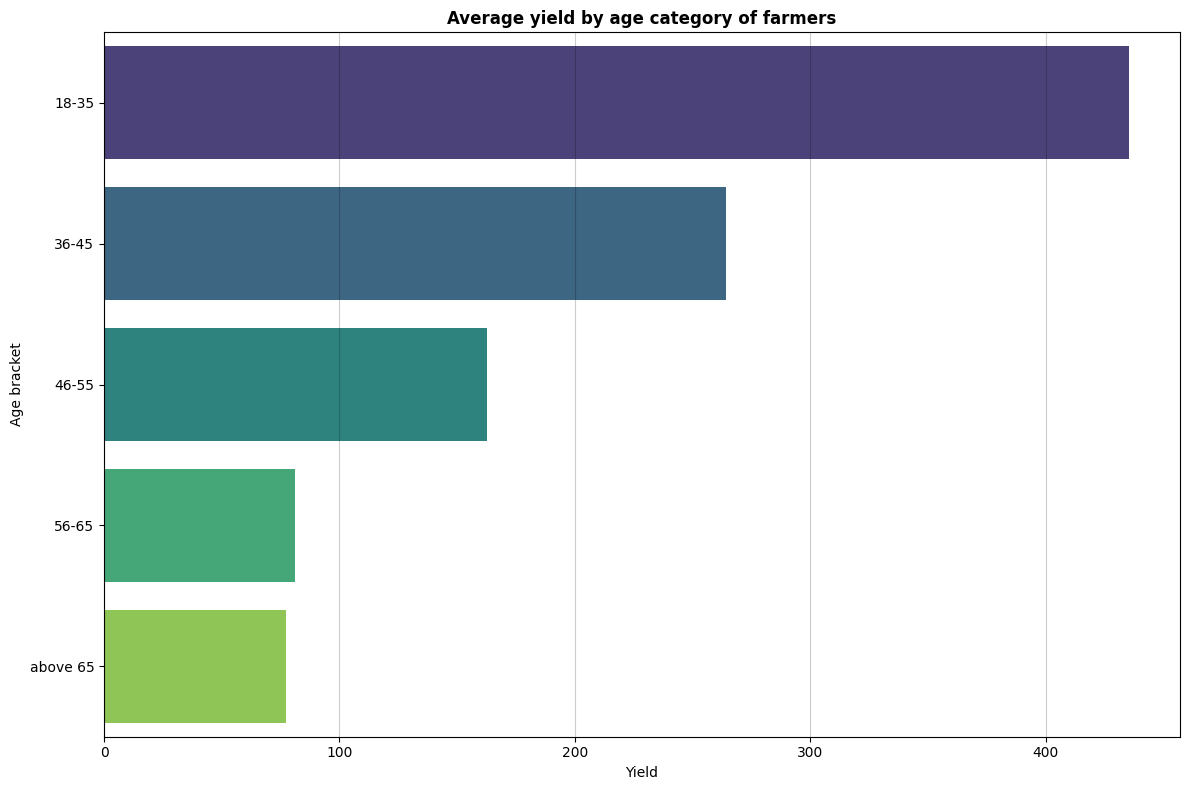

,Age bracket
36-45,104
46-55,81
18-35,76
56-65,51
above 65,16


In [ ]:
age_yield = df.groupby('Age bracket')['Yield'].mean()

plt.figure(figsize = (12,8))
sns.barplot(y = age_yield.index, x = age_yield, palette = 'viridis')
plt.title('Average yield by age category of farmers', fontweight = 'bold')

plt.grid (True, axis = 'x', alpha = 0.2, color = 'black')
plt.tight_layout()
plt.show()

display(pd.DataFrame(df['Age bracket'].value_counts()))

18-35 the most effective farmers

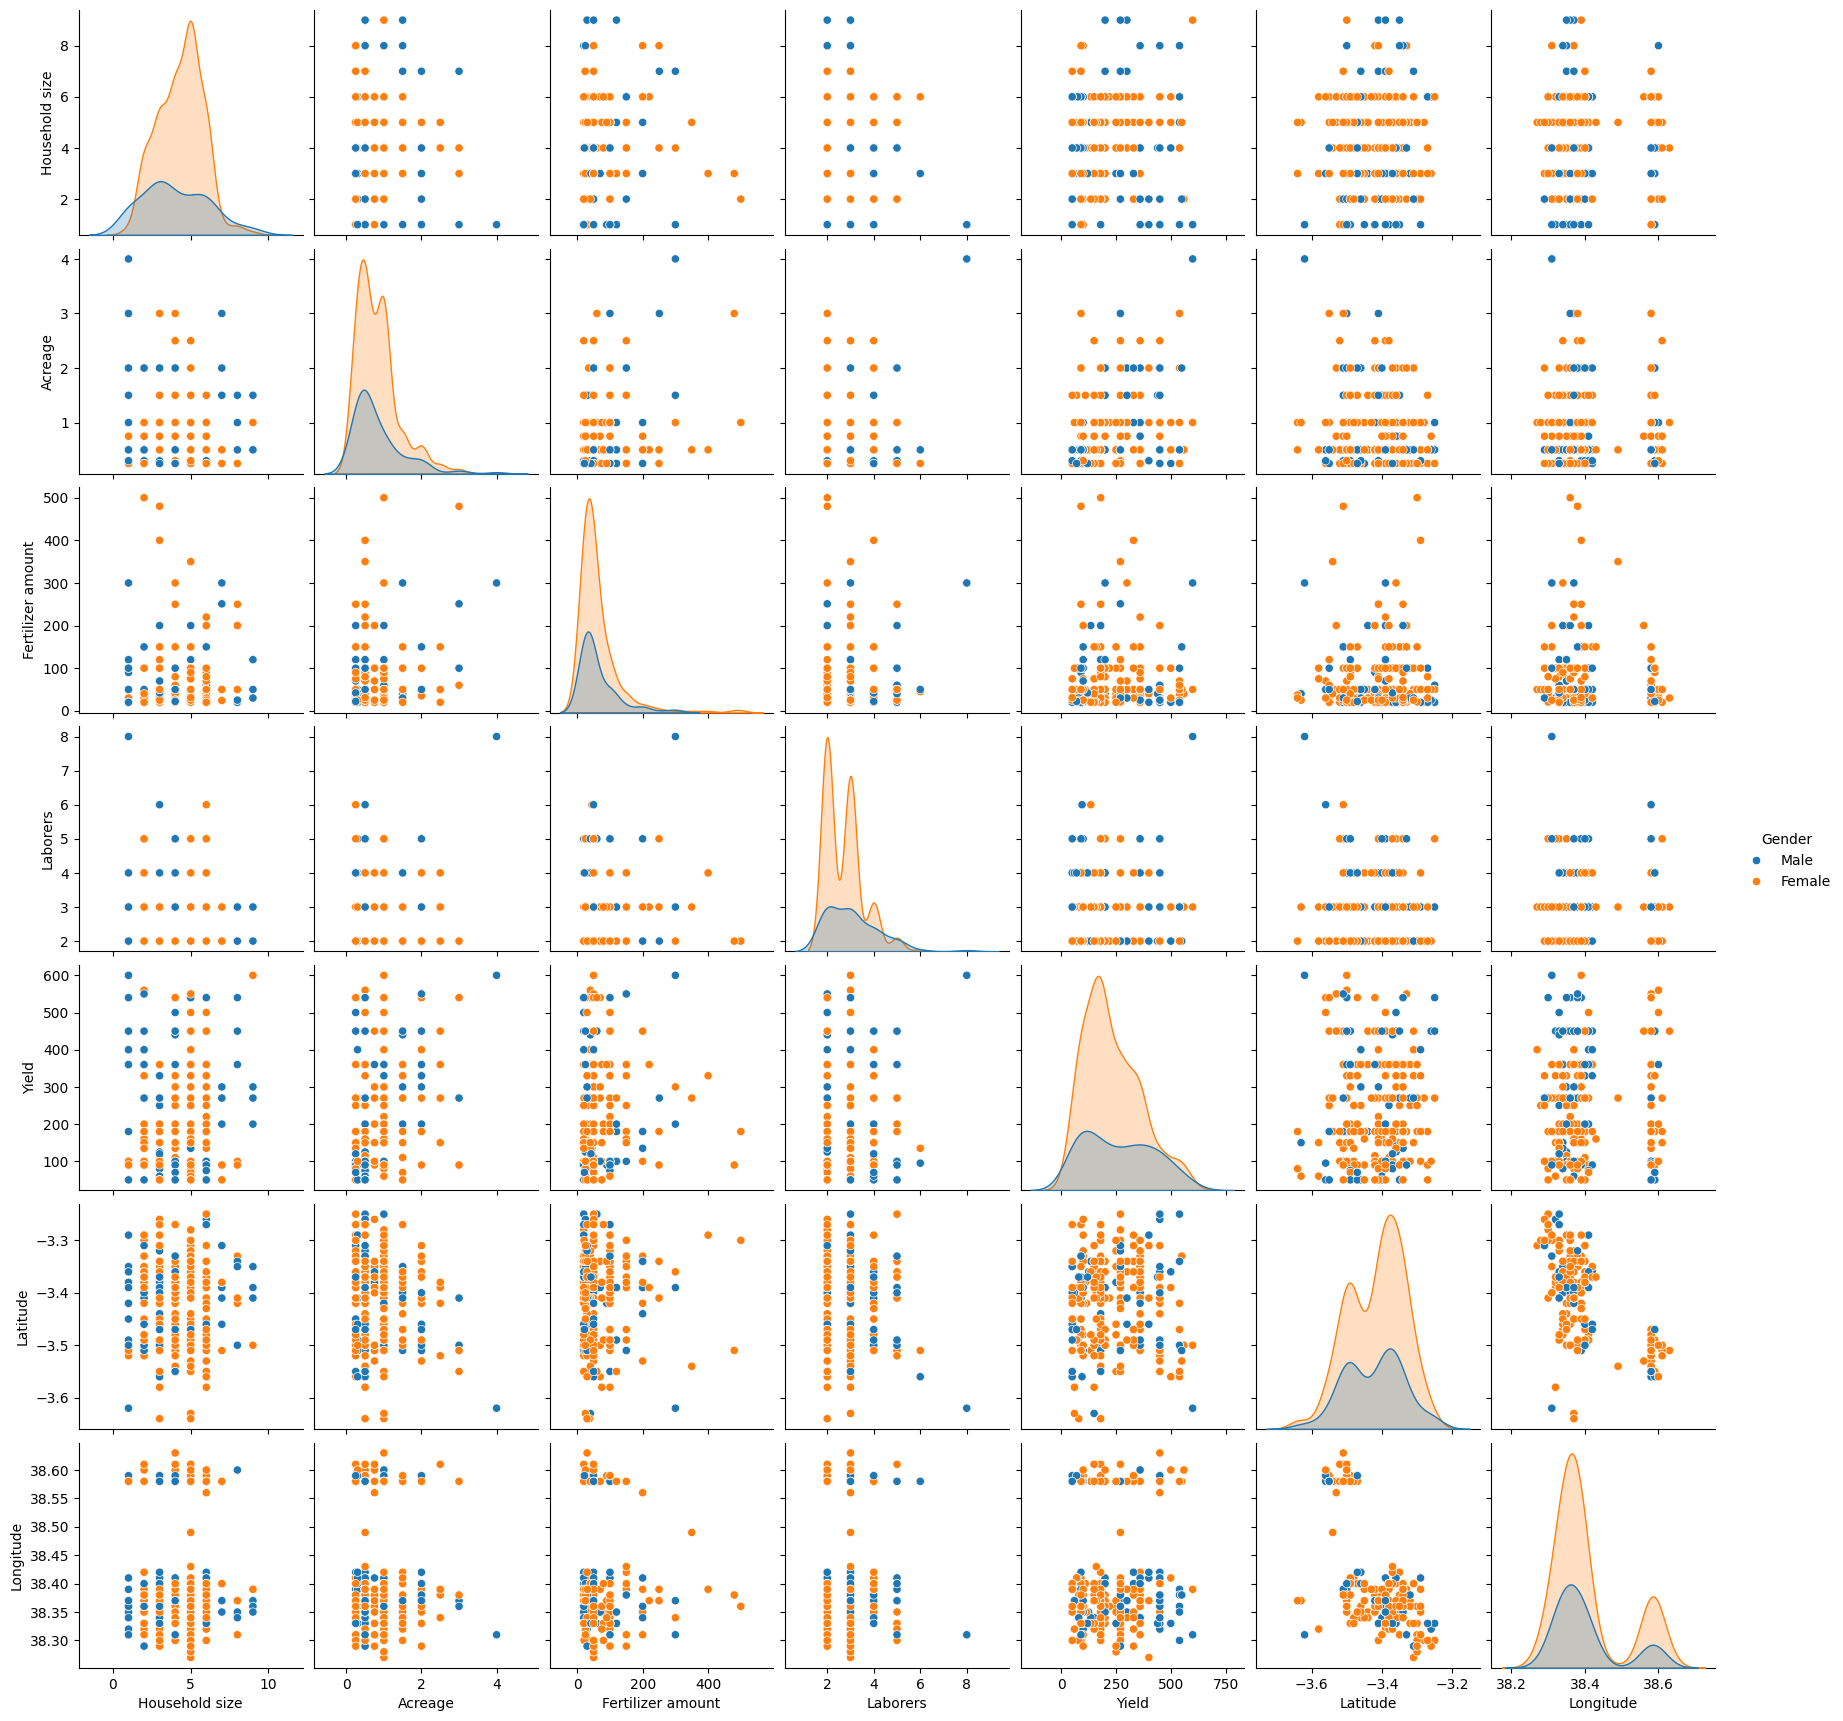

In [ ]:
sns.pairplot(df, hue = 'Gender')
plt.show()



*  The share of women involved in farming is significantly higher than men
*  The total harvest of women farmers is significantly higher than the same indicator for men




In [ ]:
df.groupby('Gender')['Yield'].mean()

Gender
Female    232.446352
Male      262.315789
Name: Yield, dtype: float64

Despite the previous higher proportion of women involved in farming and their overall yields, men's efficiency is slightly higher

In [ ]:
pd.DataFrame(df.groupby('Gender')['Age bracket'].value_counts())

Age bracket
Gender Age bracket             
Female 36-45                 84
       46-55                 66
       18-35                 42
       56-65                 28
       above 65              13
Male   18-35                 34
       56-65                 23
       36-45                 20
       46-55                 15
       above 65               3

**Average yield for men and women in each group**

There are more women in each age group

In [ ]:
result = pd.DataFrame(df.groupby(['Gender', 'Age bracket'])['Yield'].mean(), columns=['Yield'])
result

Yield
Gender Age bracket            
Female 18-35        437.380952
       36-45        264.404762
       46-55        155.606061
       56-65         82.142857
       above 65      77.692308
Male   18-35        432.647059
       36-45        262.500000
       46-55        193.333333
       56-65         79.565217
       above 65      76.666667

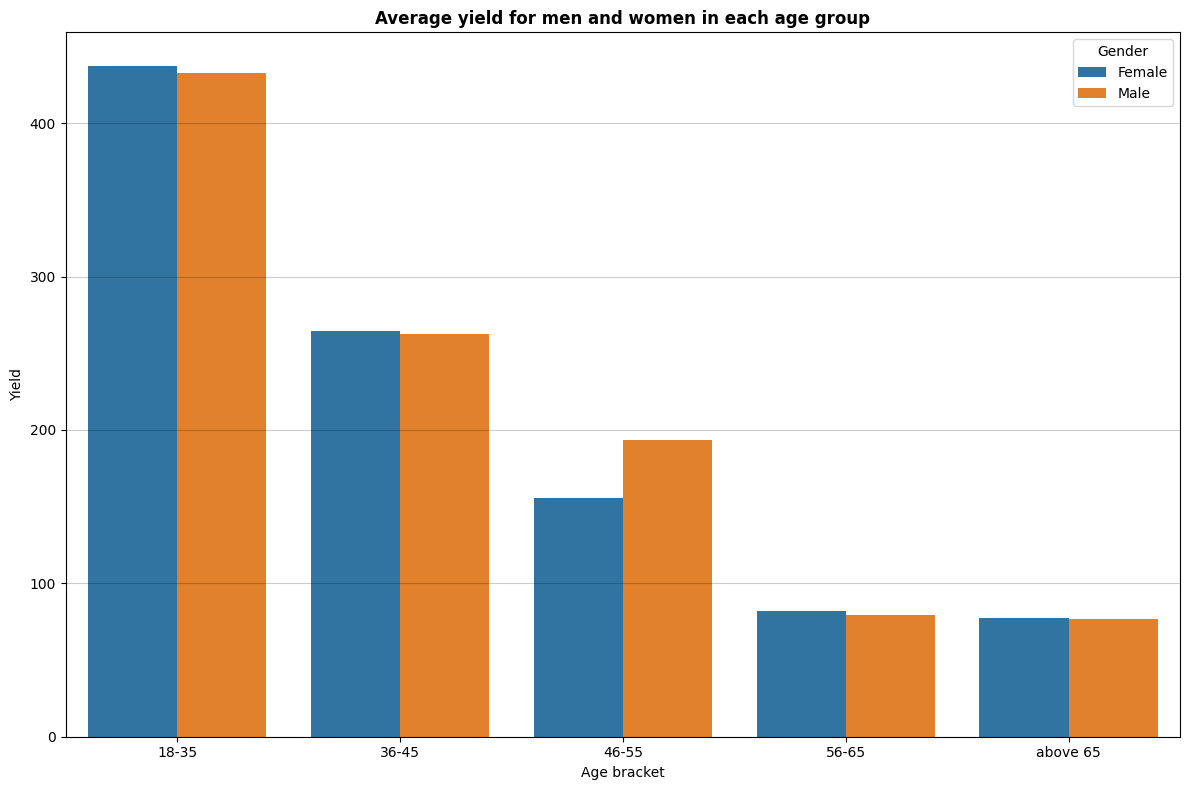

In [ ]:
result_reset = result.reset_index()

plt.figure(figsize = (12,8))

sns.barplot(x='Age bracket', y='Yield', hue='Gender', data=result_reset)
plt.title('Average yield for men and women in each age group', fontweight = 'bold')

plt.grid(True, axis = 'y', alpha = 0.2, color = 'black')
plt.tight_layout()
plt.show()

For the most part, the average yield for each gender is extremely similar. The disparity between the groups in general (women and men) in the previous conclusion is explained by the disparity in the age group (46-55)

In [ ]:
corr = df.corr(numeric_only = True)


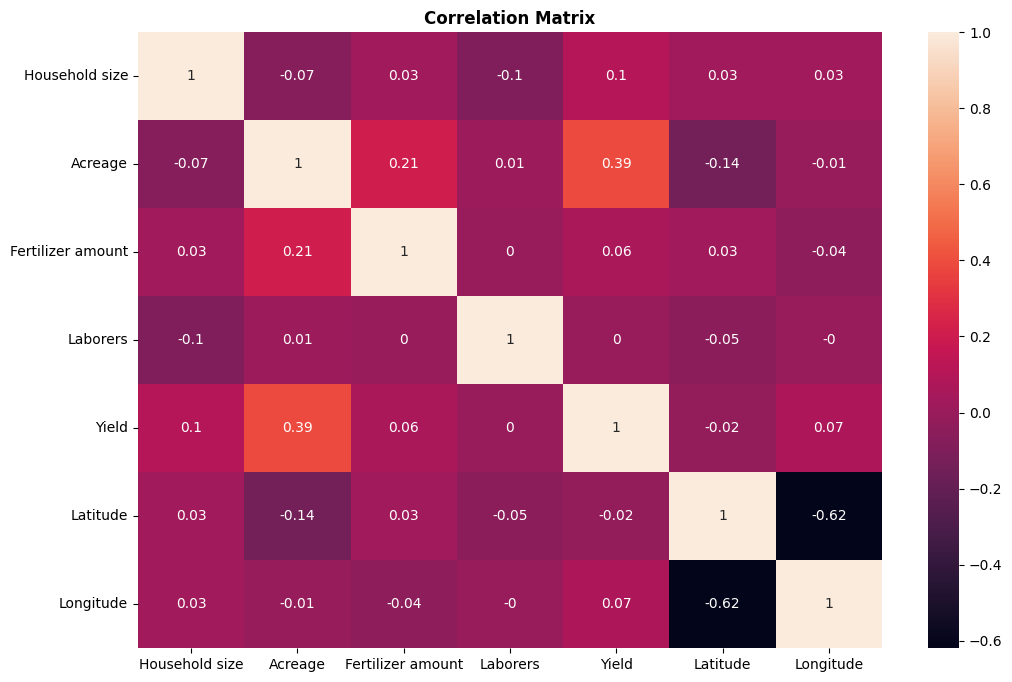

In [ ]:
plt.figure(figsize = (12,8))
sns.heatmap(corr.round(2), annot = True)
plt.title('Correlation Matrix', fontweight = 'bold')

plt.show()

In [ ]:
(df.describe(include = 'object').nunique() >=1).index

Index(['County', 'Farmer', 'Education', 'Gender', 'Age bracket', 'Crop',
       'Power source', 'Water source', 'Main credit source', 'Crop insurance',
       'Farm records', 'Main advisory source', 'Extension provider',
       'Advisory format', 'Advisory language'],
      dtype='object')

In [ ]:
df.describe(include='object')

,County,Farmer,Education,Gender,Age bracket,Crop,Power source,Water source,Main credit source,Crop insurance,Farm records,Main advisory source,Extension provider,Advisory format,Advisory language
count,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328
unique,1,328,5,2,5,1,1,1,3,1,2,5,4,2,3
top,TAITA TAVETA,fmr_65,Primary,Female,36-45,corn,Manual,Rain,Credit groups,No,No,Radio,County Government,Phone Calls,Kiswahili
freq,328,1,195,233,104,328,328,328,248,328,238,144,189,224,254


In [ ]:
# more than 1 unique value
columns_to_encode = ['Education', 'Gender', 'Age bracket', 'Main credit source', 'Farm records', 'Main advisory source', 'Extension provider', 'Advisory format', 'Advisory language']

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df_encoded = df.copy()

df_encoded = df_encoded.drop(['County', 'Farmer', 'Crop', 'Power source', 'Water source', 'Crop insurance'], axis = 1)

for column in columns_to_encode:
    df_encoded[column] = encoder.fit_transform(df_encoded[column])

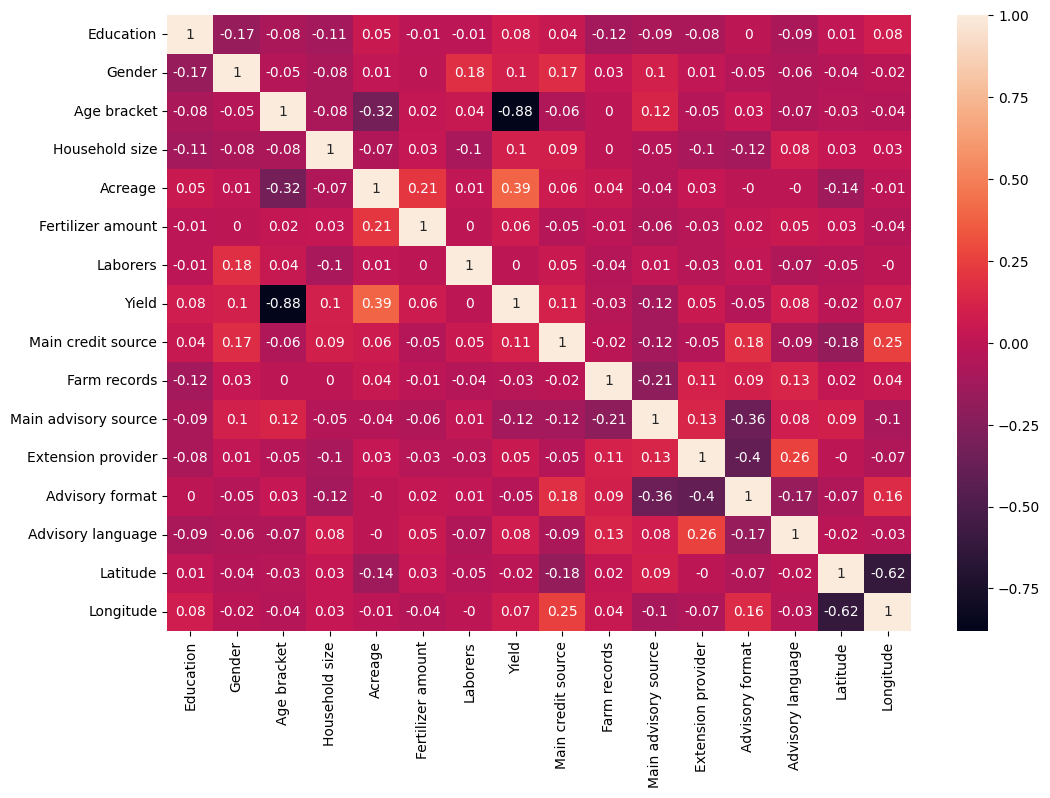

In [ ]:
corr_2  =df_encoded.corr()

plt.figure(figsize = (12,8))
sns.heatmap(corr_2.round(2), annot = True)

plt.show()

# **Selecting features**

In [ ]:
corr_2['Yield'].abs().sort_values(ascending = False).round(2)

Yield                   1.00
Age bracket             0.88
Acreage                 0.39
Main advisory source    0.12
Main credit source      0.11
Household size          0.10
Gender                  0.10
Education               0.08
Advisory language       0.08
Longitude               0.07
Fertilizer amount       0.06
Extension provider      0.05
Advisory format         0.05
Farm records            0.03
Latitude                0.02
Laborers                0.00
Name: Yield, dtype: float64

In [ ]:
FEATURES = ['Age bracket', 'Acreage', 'Main advisory source', 'Main credit source', 'Household size', 'Gender']
TARGET = ['Yield']

In [ ]:
from sklearn.model_selection import train_test_split

X = df_encoded[FEATURES]
y = df_encoded['Yield']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [ ]:
import tensorflow as tf

normalizer = tf.keras.layers.Normalization(axis=-1)

linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [ ]:
linear_model.predict(X_train[:10])

1/1 [==============================] - 0s 156ms/step


array([[-4.9818892],
       [-1.5757062],
       [-3.9715903],
       [-3.1013813],
       [-2.9702604],
       [-3.5120573],
       [-3.470361 ],
       [-3.649663 ],
       [-3.0410454],
       [-3.7383444]], dtype=float32)

In [ ]:
linear_model.layers[1].kernel

<tf.Variable 'dense/kernel:0' shape=(6, 1) dtype=float32, numpy=
array([[-0.15970874],
       [ 0.44340742],
       [-0.10919273],
       [ 0.70150554],
       [-0.68123657],
       [-0.30946904]], dtype=float32)>

In [ ]:
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_squared_error')

In [ ]:
# multiple inputs
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

loss = tf.losses.MeanSquaredError()


linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss=loss)

In [ ]:
linear_model.fit(
    X_train, y_train,
    epochs=100,
    verbose=1,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

Epoch 1/100
7/7 [==============================] - 1s 42ms/step - loss: 76473.6641 - val_loss: 82560.8672
Epoch 2/100
7/7 [==============================] - 0s 13ms/step - loss: 73313.4141 - val_loss: 79193.0156
Epoch 3/100
7/7 [==============================] - 0s 13ms/step - loss: 70299.6172 - val_loss: 75956.3750
Epoch 4/100
7/7 [==============================] - 0s 14ms/step - loss: 67396.2812 - val_loss: 72865.9219
Epoch 5/100
7/7 [==============================] - 0s 13ms/step - loss: 64535.9570 - val_loss: 69964.3359
Epoch 6/100
7/7 [==============================] - 0s 12ms/step - loss: 61988.9844 - val_loss: 67141.5859
Epoch 7/100
7/7 [==============================] - 0s 13ms/step - loss: 59433.7305 - val_loss: 64473.1367
Epoch 8/100
7/7 [==============================] - 0s 10ms/step - loss: 57070.5703 - val_loss: 61938.7500
Epoch 9/100
7/7 [==============================] - 0s 10ms/step - loss: 54789.7227 - val_loss: 59543.4922
Epoch 10/100
7/7 [============================

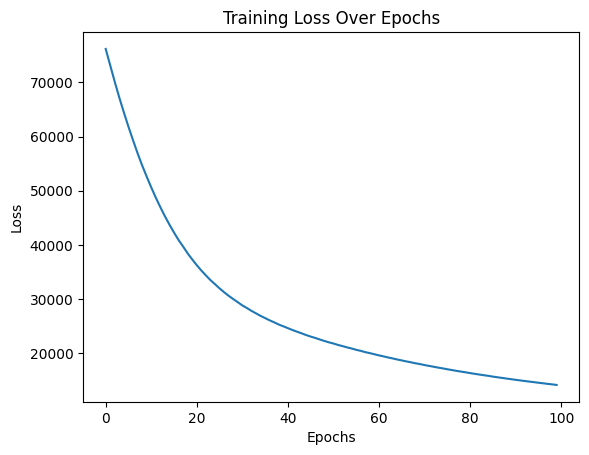

In [ ]:
# Plot the training loss
plt.plot(history.history['loss'])
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
#test_results['linear_model'] = linear_model.evaluate(
    #X_test, y_test, verbose=0)

linear_model.evaluate(
    X_test, y_test, verbose=1)

3/3 [==============================] - 0s 4ms/step - loss: 12276.8291


12276.8291015625

In [ ]:
# Assuming you have a linear_model defined earlier
linear_model_results = linear_model.predict(X_test)

# Calculate Mean Squared Error
mse_linear_model = mean_squared_error(y_test, linear_model_results)

# Adding the calculated MSE to the test_results dictionary
test_results = {}
test_results['linear_model_mse'] = mse_linear_model

# Displaying the calculated MSE
print(f'Mean Squared Error for linear_model: {mse_linear_model}')


3/3 [==============================] - 0s 4ms/step
Mean Squared Error for linear_model: 12276.829269022459


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Create and fit the GradientBoostingRegressor
gradient_boosting_model = GradientBoostingRegressor(loss='squared_error', n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gradient_boosting_model.fit(X_train, y_train)

# Predictions on the test set
predictions_gbr = gradient_boosting_model.predict(X_test)

# Evaluate the performance
mse = mean_squared_error(y_test, predictions_gbr)
print(f'Mean Squared Error GBR: {mse}')

Mean Squared Error GBR: 4531.071851791863


In [ ]:
# Convert the dataset into a TensorFlow dataset.
import tensorflow_decision_forests as tfdf

# Combine features and labels into a single DataFrame for training and testing
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

# Convert the dataset into a TensorFlow dataset.
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label="Yield")
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df, label="Yield")


In [ ]:
# Train a Random Forest model.
model = tfdf.keras.RandomForestModel()
model.fit(train_ds)

Use /tmp/tmp2zgpvifx as temporary training directory
Reading training dataset...
Training dataset read in 0:00:04.805513. Found 262 examples.
Training model...
Model trained in 0:00:02.476742
Compiling model...
Model compiled.


In [ ]:
# Obtain predictions from the Random Forest model
predictions = model.predict(test_ds)

# Reshape predictions to a 1D array
y_pred = predictions[:, 6]  # Assuming the target variable is in the seventh column

# Extract true labels from the test dataset and reshape to a 1D array
y_true = np.array(list(test_ds.map(lambda x, y: y))).reshape(-1)

# Calculate Mean Squared Error
mse_random_forest = mean_squared_error(y_true, y_pred)

# Displaying the calculated MSE
print(f'Mean Squared Error for Random Forest: {mse_random_forest}')

1/1 [==============================] - 0s 50ms/step
Mean Squared Error for Random Forest: 73045.07575757576


**As it is a prediction problem, loss function is the best metric to use for evaluation. The loss function of Gradient boosting is less when compared to linear regression and random forests algorithm. so the gradient boosting algorithm find the best fit for the test data provided.**